In [1]:
import random, string, math, re, os
import fitz
# from pyhanlp import HanLP
from faker import Faker
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageSequence, ImageFont
# import en_core_web_lg
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from LAC import LAC
lac = LAC(mode="lac")    
from ltp import LTP
ltp = LTP("LTP/small")  # 默认加载 Small 模型
import pandas as pd


G:\Anaconda\main\envs\data_masking\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pytesseract

In [12]:
#!pip install -U pytesseract

In [3]:
doc_text = []
fake = Faker("zh_tw")
doc = ''
doc_path ='5.pdf'
colorList = fitz.utils.getColorList()
font_language = {1:'zh', 2:'en'}
d = ''

>>Current editing page 0 
rE ee oh

Iran

BEA (MPF} Industry Scheme [nm
RO (MAR) TENE

Employer - Remittance Statement (Relevant Employee)

EE-HELAR (-REA)

Eom tte gy pin ce SE BLOCK ETS fr rand woe phe

Fars esaR: dina
aT ———

ERI v hee ae RAs ms! esas

Details of Employer
S-#9 REmE

Tr TE Ro Ty Tre Co
Raman

a EE,

rene ai

SRR oe guar EB autzzore

BEA (MPF) Industry Scheme No.
Ra (mR) TETAR

EAI 10:00,12,3,4,56 78-1000

Details of Contibutions (spplkable 10 pew amployee) =r 47 .
HHO PHAN ABRYER) SX

ETT _—— _
AREER BIA) seenrons [a ra rm fd
ar | om, | [EE me anc mili
Cry Lis HHEEG | GREER WEER | EREER (mae
| Sy |
a 0,000 | 500 500.
ANZ (1) rans rsa orvems Boras | 10,000 | 500 7,000 ot12012
H ¥
§ H
H H
=
er
sows [7500 fi
wo rT wm

[——

paw we RIT Gili ssw

>>Current editing page 1 
Pertlll Details of Contributions (applicable to existing employee)
E=#e HREM @ARRAES)

rT a Br Fa —L
vl me | 220 | nen PE Ee rw pi
Et TE |W mo | | ar | aa | ER

wan SHEER | AEERE | Whee | WRard Ld aa (B=)

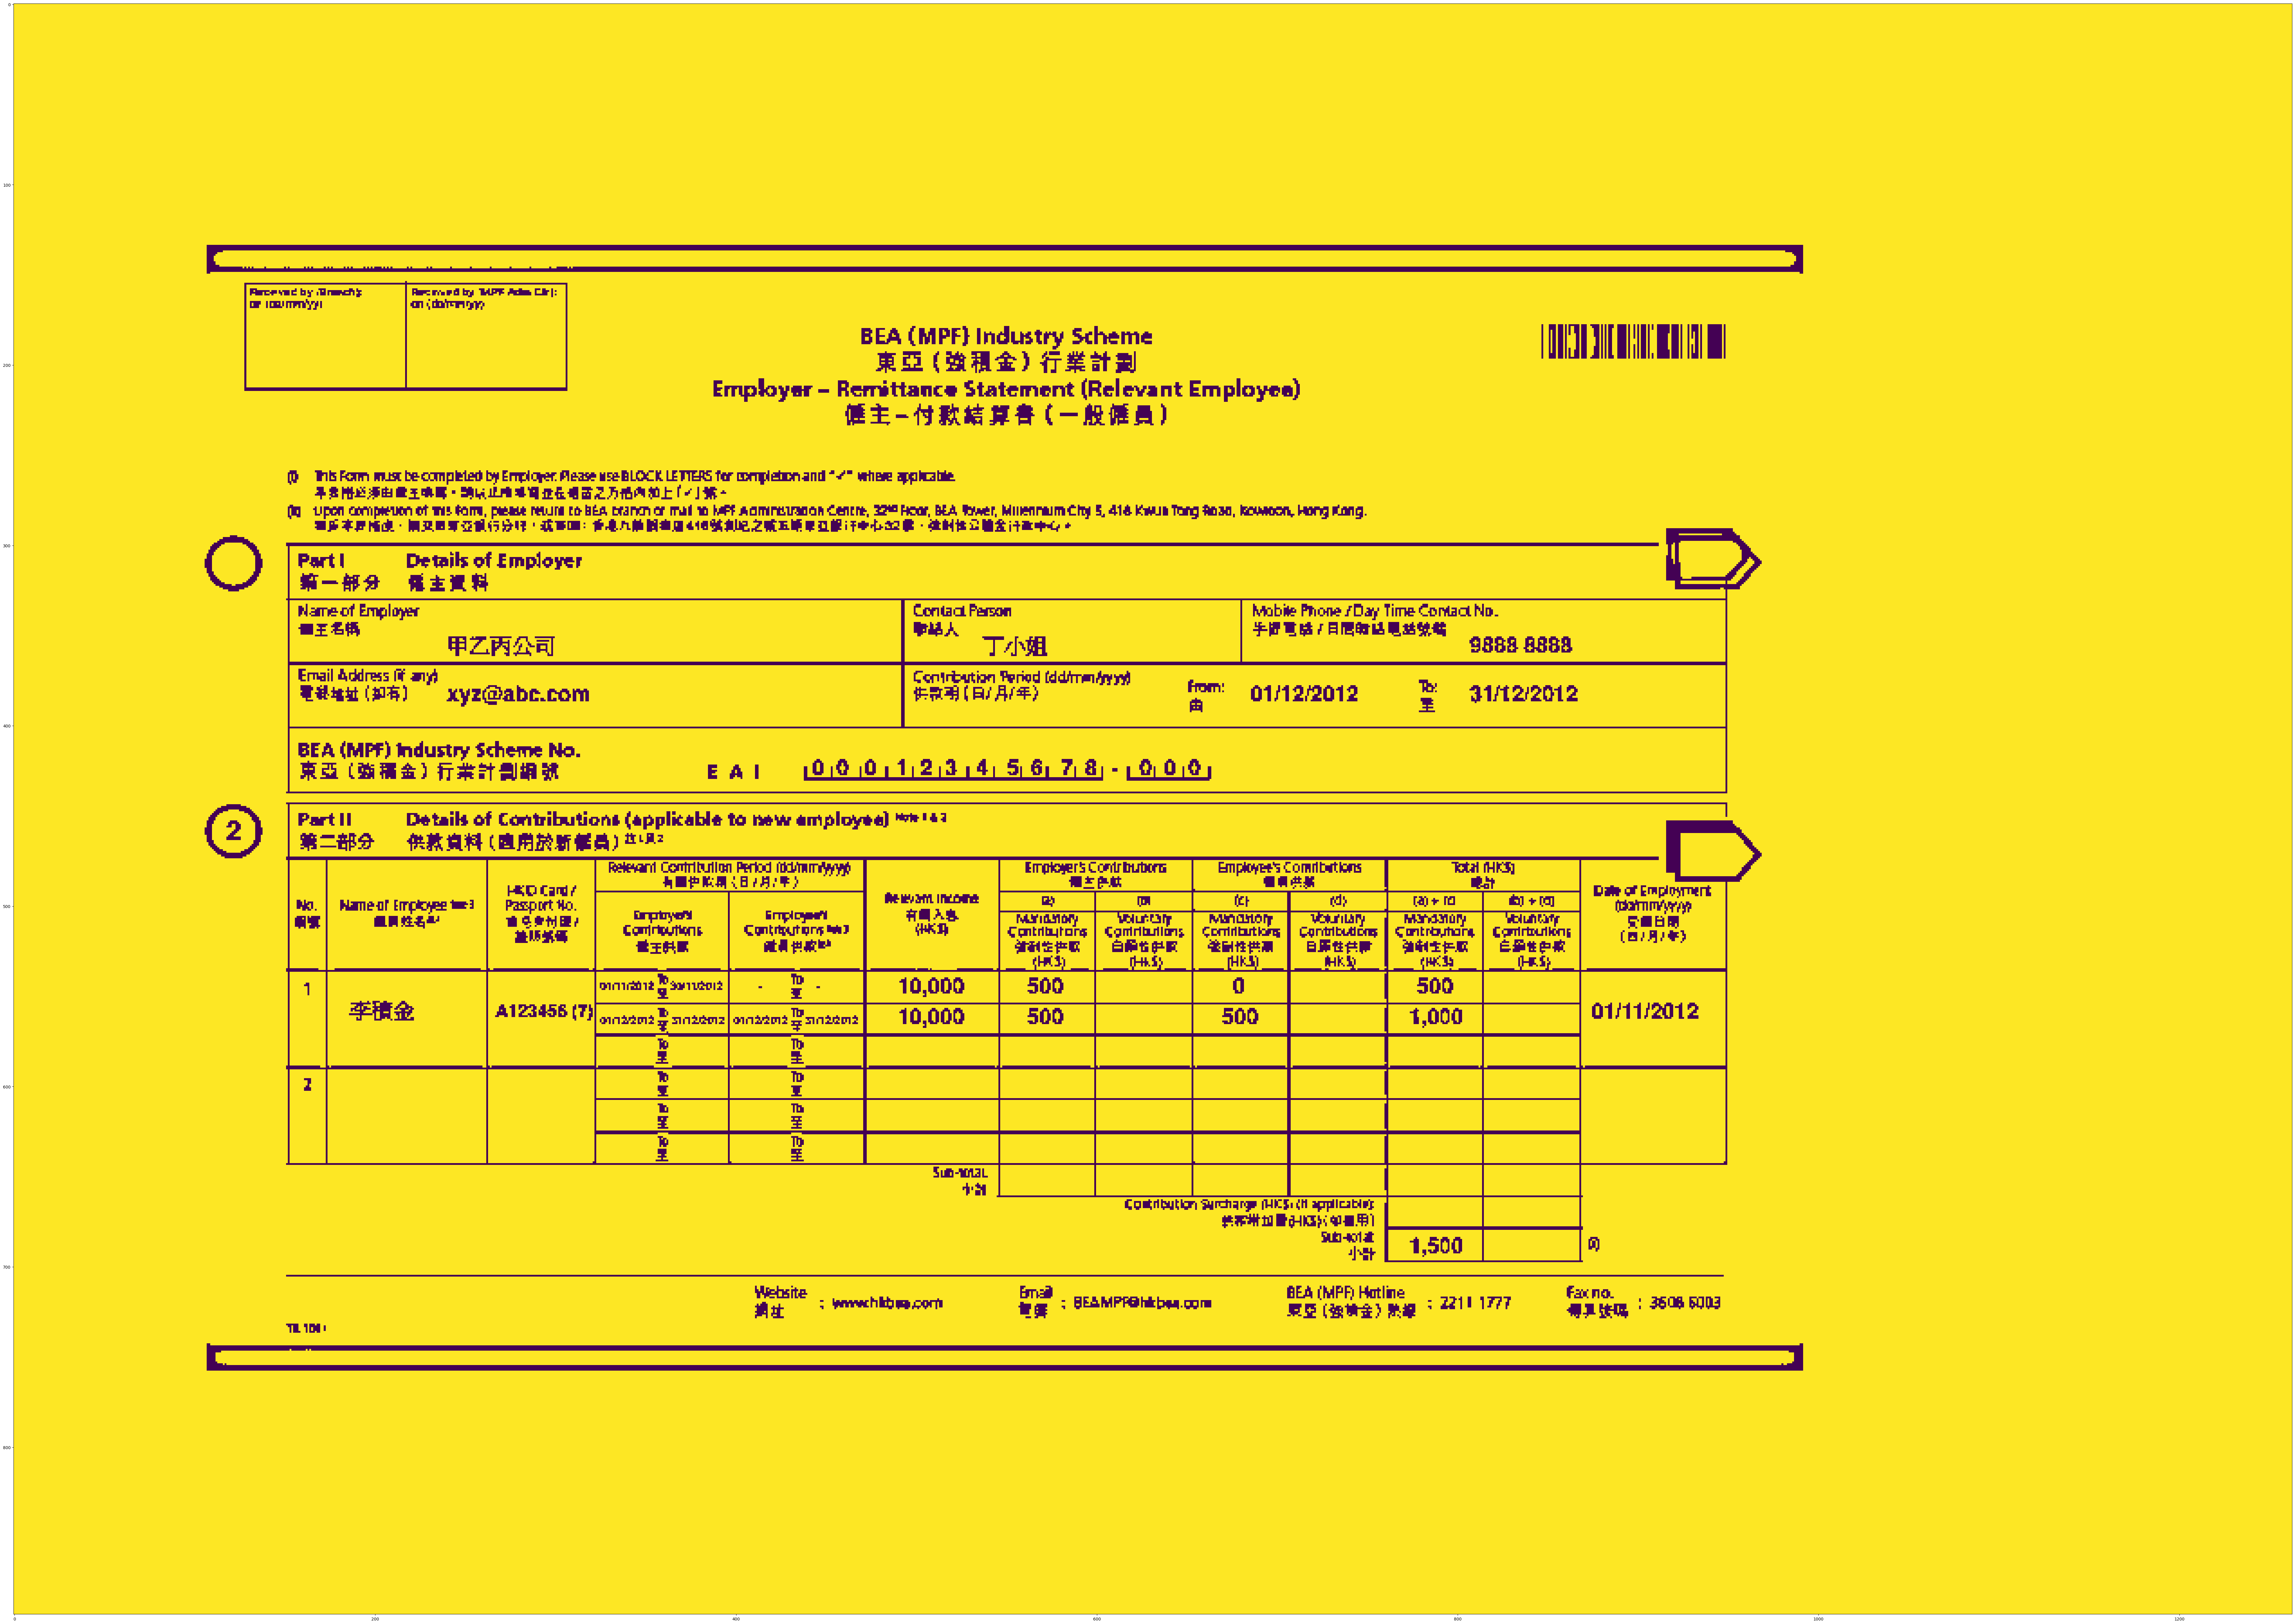

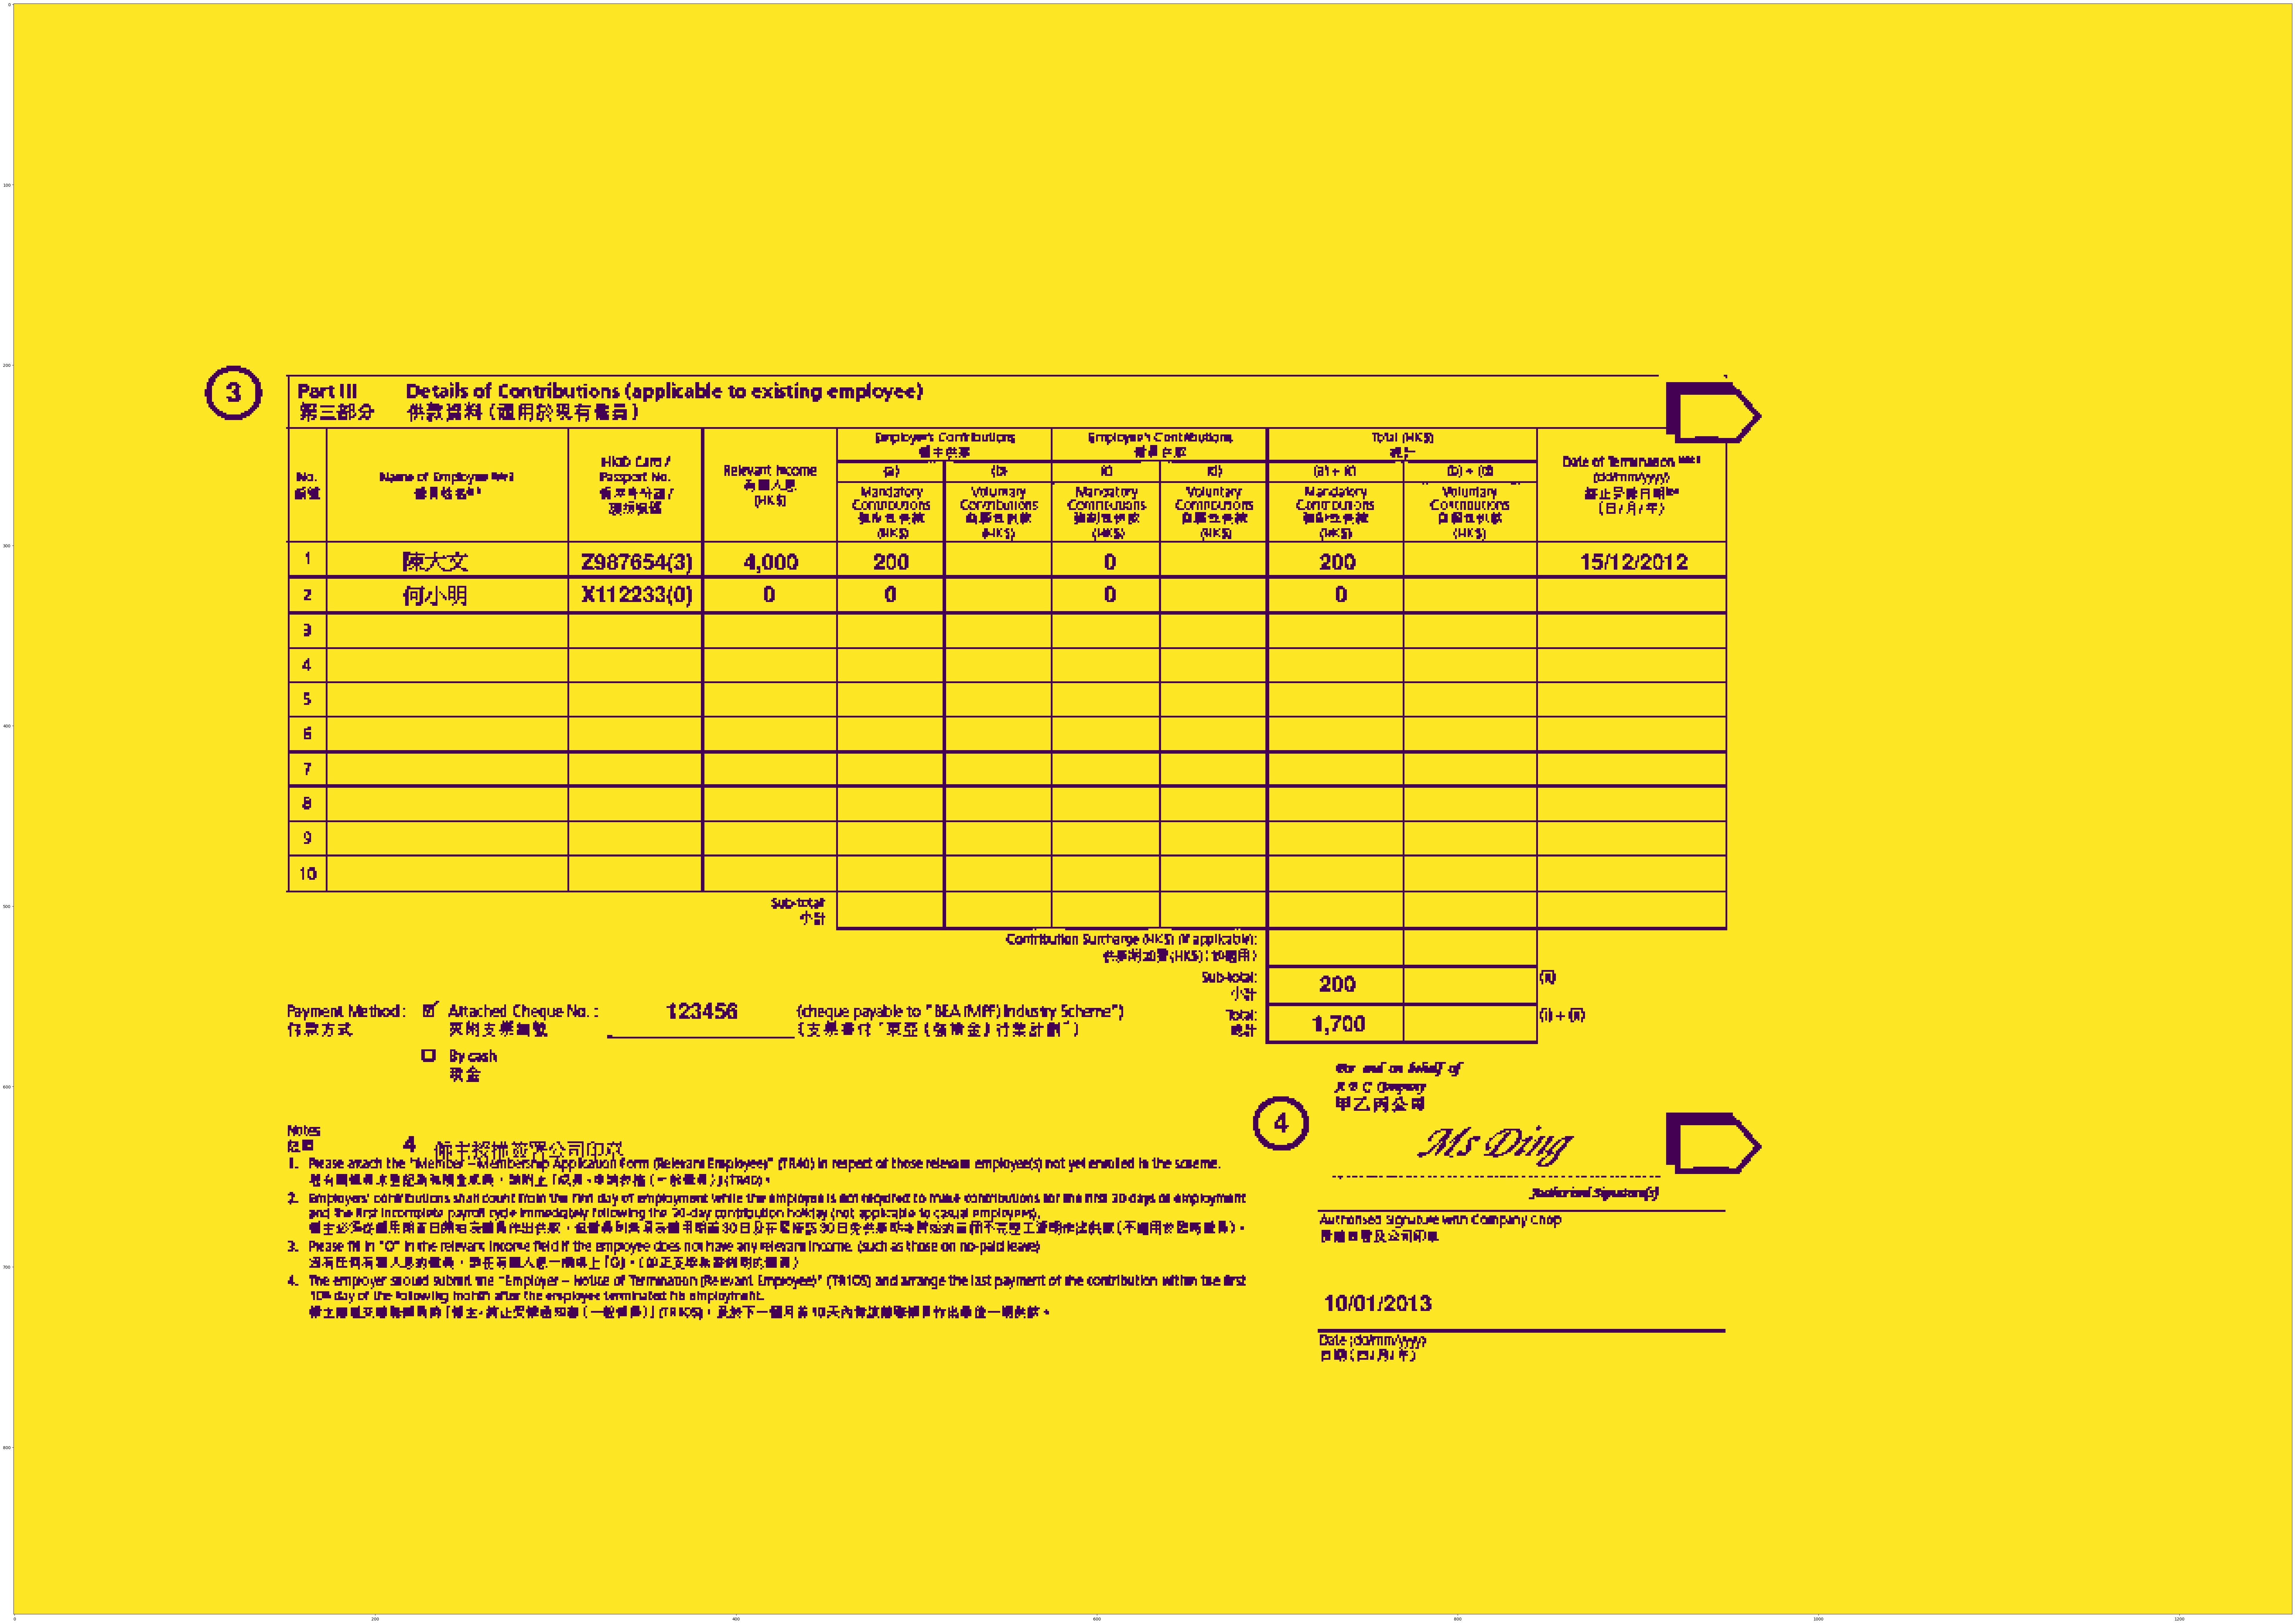

In [4]:
doc = fitz.open(doc_path)
for i in range(2):
    print(f">>Current editing page {i} ")
    page = doc[i]
    if not page.is_wrapped:
        page.wrap_contents() 
    try:
        rotate = int(0)
        zoom = 1.5
        trans = fitz.Matrix(zoom, zoom).prerotate(rotate)
        scale_pixmap = page.get_pixmap(matrix=trans, alpha=False,colorspace=fitz.csRGB)
        img = Image.frombytes("RGB", [scale_pixmap.width, scale_pixmap.height], scale_pixmap.samples)
        img = img.convert('L')

        cleaned_page_array = cv2.adaptiveThreshold(np.array(img), 
                                255,
                                # cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY,
                                27,
                                20)
        new_image = Image.fromarray(cleaned_page_array)
        new_image.save('' + '%s.png' % i)
        
        plt.figure(figsize = (100,100))
        
        plt.imshow(cleaned_page_array)
        eng_text = pytesseract.image_to_string(new_image,"eng")
        print(eng_text)
    except Exception as e:
        print(e)

In [6]:
doc = fitz.open('5.pdf')
d_df = ""
for i in range(1):
    print(f">>Current editing page {i} ")
    page = doc[i]
    if not page.is_wrapped:
        page.wrap_contents() 
    try:
        # imglist = page.get_images()
        # for img in imglist:
        img_name = f"./{i + 1}_5.png" # save image
        #     pix = fitz.Pixmap(doc, img[0])  # image转pixmap
        rotate = int(0)
        zoom = 2
        trans = fitz.Matrix(zoom, zoom).prerotate(rotate)
        pix = page.get_pixmap(matrix=trans, alpha=False,colorspace=fitz.csGRAY)
        img = Image.frombytes("L", [pix.width, pix.height], pix.samples)
        # cleaned_page_array = cv2.adaptiveThreshold(np.array(img), 
        #                 255,
        #                 cv2.ADAPTIVE_THRESH_MEAN_C,
        #                 cv2.THRESH_BINARY,
        #                 27,
        #                 20)
        # new_image = Image.fromarray(cleaned_page_array)
        # if pix.n - pix.alpha >= 4:  # 如果差值大于等于4，需要转化后才能保存为png
        #     pix = fitz.Pixmap(fitz.csRGB, pix)
        img.save(img_name) # 存储图片
        image = Image.open(img_name)
        # image = page.get_svg_image()
        eng_text = pytesseract.image_to_string(image,"eng")
        # print(eng_text)
        d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
        print(d)
        pix = None  # 释放Pixmap资源
        d_df = pd.DataFrame.from_dict(d)
    except Exception as e:
        print(e)

>>Current editing page 0 
{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 

In [16]:
d_df = pd.DataFrame.from_dict(d)
pd.set_option('display.max_columns', None)
d_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1685,1191,-1,
1,2,1,1,0,0,0,144,180,1178,20,-1,
2,3,1,1,1,0,0,144,180,1178,20,-1,
3,4,1,1,1,1,0,144,180,1178,20,-1,
4,5,1,1,1,1,1,144,180,1178,20,95,
5,2,1,2,0,0,0,172,208,238,1,-1,
6,3,1,2,1,0,0,172,208,238,1,-1,
7,4,1,2,1,1,0,172,208,238,1,-1,
8,5,1,2,1,1,1,172,208,238,1,95,
9,2,1,3,0,0,0,176,199,77,20,-1,


In [36]:
n_boxes = len(d['text'])

obj = "BEA (MPF)"
obj_split = obj.split(" ")
cur_id = 0

cood_list = []

for i in range(n_boxes):
    if (re.search(obj_split[cur_id], d['text'][i]) and (d['conf'][i] >60)):
#         print(d['text'][i])
        cood_list.append([d['left'][i], d['top'][i], d['width'][i], d['height'][i],d['conf'][i]])
        cur_id +=1
        while cur_id < len(obj_split):
            if ((i+cur_id < n_boxes) and re.search(obj_split[cur_id], d['text'][i+cur_id]) and d['conf'][i] >60):
                cood_list.append([d['left'][i], d['top'][i], d['width'][i], d['height'][i],d['conf'][i]])
                cur_id +=1
            else:
                break
                cood_list = []
                cur_id = 0
    if len(cood_list) == len(obj_split):
        break
            
print(cood_list)
#         break
x_0 = cood_list[0][0]
y_0 = cood_list[0][1]
x_1 = cood_list[-1][0] + cood_list[-1][2]
y_1 = cood_list[-1][1] + cood_list[-1][3]

[[627, 240, 30, 13, 96], [627, 240, 30, 13, 96]]


In [5]:

            # img = img.convert('L')
            # plt.plot(img)
            # cleaned_page_array = cv2.adaptiveThreshold(np.array(img), 
            #                             255,
            #                             cv2.ADAPTIVE_THRESH_MEAN_C,
            #                             cv2.THRESH_BINARY,
            #                             27,
            #                             20)
            # plt.imshow(cleaned_page_array)
            # new_image = Image.fromarray(cleaned_page_array)
            # new_image.save('' + '%s.png' % i)
            # imageRead = cv2.imread('' + '%s.png' % i,0)
            # plt.imshow(imageRead)
            # fp = io.BytesIO()  # Pillow will write to this "file pointer"
            # new_image.save(fp, "JPEG") # saving the image in memory
            # page = output_doc.new_page(width=new_image.size[0], 
            #                         height=new_image.size[1])  # make page in target Document
            # page.insert_image(page.rect, stream=fp.getvalue())
            
            # scale_pixmap.save('' + '%s.png' % i)
            # image = cv2.imread('' + '%s.png' % i,0)
                        
            # plt.imshow(image)




            # # ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
            # ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
            # # ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
            # # ret,thresh = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
            # # thresh3.save('' + '%s_22.png' % i)
            # plt.figure(figsize = (100,100))
            # # plt.imshow(thresh1)
            # # plt.imshow(thresh2)
            # # plt.imshow(thresh3)
            # # plt.imshow(thresh)
            
            
            
            # ##
            # # Process english text
            # eng_text = pytesseract.image_to_string(thresh,"eng")
            # eng_text_process = eng_text.split('\n')
            # modifyList = []
            # print(eng_text_process)

            # nlp = en_core_web_lg.load()
            # n1 = nlp(eng_text.replace('\n', " "))
            # names = [(ent.text).strip() for ent in n1.ents if ent.label_ == 'PERSON']
            # print(names) #show identified names
            
            # for text in eng_text_process:
            
            #     person_list_temp = []
            
            #     nltk_results = ne_chunk(pos_tag(word_tokenize(text)))
            #     for nltk_result in nltk_results:
            #         if type(nltk_result) == Tree:
            #             name = ''
            #             for nltk_result_leaf in nltk_result.leaves():
            #                 name += nltk_result_leaf[0] + ' '
            #             if(nltk_result.label()=="PERSON"):
            #                 person_list_temp.append(name)
                # print ('Type: ', nltk_result.label(), 'Name: ', name)
            # if(len(text)>0 and (text.count(" ") != len(text))):
            #     list_name_found = searchNameMatch(text,'ltp')
            #     if(list_name_found):
            #             print(list_name_found)
            #             for _name in list_name_found:
            #             # generate fake naem
            #            name_found = searchNameMatch(text,'lac')
            #       if(list_name_found):
            #             print(list_name_found)
            #             for _name in list_name_found:
            #             # generate fake naem
            #                 fake = Faker("zh_tw")
            #                 modifyList.append([_name, fake.name(),1])
            # print(text)
#             img_list = doc.get_page_images(i)
# #             print(img_list)
#             for num, img in enumerate(img_list):
#                 # plt.plot(img)
                
#                 img_name = f"./{i + 1}_{num + 1}.png" # save image
#                 pix = fitz.Pixmap(doc, img[0])  # image转pixmap
# #                 if pix.n - pix.alpha >= 4:  # 如果差值大于等于4，需要转化后才能保存为png
# #                     pix = fitz.Pixmap(fitz.csRGB, pix)
#                 pix.save(img_name) # 存储图片
#                 pix = None  # 释放Pixmap资源
# #         #         image = Image.open(img_name)
#                 image = cv2.imread(img_name,0) #直接读为灰度图像
#                 image = 255 * np.array(image).astype('uint8')
#                 ret,thresh3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
                
#                 print(text)
#                 print(" ")
        
            
                 fake = Faker("en")
            #                 modifyList.append([_name, fake.name(),1])
#                         list_name_found = searchNameMatch(text,'ltp')
#                         print(list_name_found)
#                         print('-------------')
            # print('-0------')
            # chi_text = pytesseract.image_to_string(thresh4,"chi_tra")
            # chi_text_process = chi_text.split('\n')
            # for text in chi_text_process:
            #     if(len(text)>0 and (text.count(" ") != len(text))):
            #       list_

IndentationError: unexpected indent (2503132126.py, line 100)

In [76]:
def searchIDMatch(_text):
#     print(_text)
#     reg = r"([a-zA-Z][0-9]{6})\s*\(\s*[0-9]\s*\)"
    reg = r"[a-zA-Z]{0,1}[0-9]{6,7}\s*\([0-9]{0,1}\){0,1}"
    trackID = re.findall(reg,_text)
    if(trackID):
        return(trackID)
    return None

def id_generator(size=6, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

def rewriteName(name_tuple, _blockText, _page, imgflag = False, _imgConfig = None):
    nameExtracted = name_tuple[0]
    newName = name_tuple[1]
    nameLang = name_tuple[2]

#         if(nameExtracted):
        # print(nameExtracted)
        ##
        # get text format
#                 print(blockText)
    fontSize, fontType, fontColor, fontdir = 1,'arial',0,(0,0),
    text_loca = [[0,0,0,0]]
    
    if imgflag:
        fontSize = _blockText['lines'][0]['spans'][0]['size']
        fontType = _blockText['lines'][0]['spans'][0]['font']
        fontColor = _blockText['lines'][0]['spans'][0]['color']
        fontdir = _blockText['lines'][0]['dir']
        text_loca = _page.search_for(nameExtracted)
        
    else:
        fontSize = _imgConfig["fontSize"]
        text_loca = _imgConfig["text_loca"]
        fontType = _imgConfig["fontType"]if _imgConfig["fontType"] != None else fontType
        fontColor = _imgConfig["fontColor"] if _imgConfig["fontColor"] != None else fontColor
        fontdir = _imgConfig["fontdir"] if _imgConfig["fontdir"] != None else fontdir
        
    fontColorRGB = fitz.utils.getColor(colorList[fontColor].lower())
    fontRotationDegree = math.atan2(fontdir[0], fontdir[1])*180/math.pi - _page.rotation
    fontFilePath = getFontPath(fontType,font_language[nameLang])

    print('---> Name Change')
    print(f'{nameExtracted} -> {newName}')
    print(f'Location: {text_loca[0]} | Font Size: {fontSize} | Font Type: {fontType} | Font Path: {fontFilePath}')
    print(f'Color: {fontColor} -> {fontColorRGB} : {colorList[fontColor]} | Rotation: {fontdir} -> {fontRotationDegree} | Page Rotation: {_page.rotation}')
    ##
    # define font 
    _page.draw_rect(
        text_loca[0],
        color=(1,1,1),
        fill=(1,1,1),
        width=0
    )
    _page.insert_font(fontname=fontType,fontfile=fontFilePath, fontbuffer=newName , set_simple=False )
    _page.insert_text(
        fitz.Point(text_loca[0][2],text_loca[0][3]),
        newName,
        fontname=fontType,
        fontsize=fontSize,
        lineheight=1,
#         color=(0.5,0.5,0),
        color=fontColorRGB, 
        # fill=(1,1,1,1), 
        render_mode=0, 
        border_width=1, 
        rotate=fontRotationDegree, 
        morph=None, 
        overlay=True
    )
    _page.draw_rect(
        text_loca[0],
        color=(1,1,0.6),
        fill=(1,1,0.6),
        fill_opacity=0.5,
        width=0
    )
    print(" ")

In [50]:
doc_text = []
fake = Faker("zh_tw")
doc_path ='6.pdf'
colorList = fitz.utils.getColorList()
font_language = {1:'zh', 2:'en'}
d = ''
doc = fitz.open(doc_path)
_page = doc[0]
if not _page.is_wrapped:
    _page.wrap_contents() 

# pre process image
img_name = '' + str(i) + '.png'
rotate = int(0)
zoom = 1.5
trans = fitz.Matrix(zoom, zoom).prerotate(rotate)
scale_pixmap = _page.get_pixmap(matrix=trans, alpha=False,colorspace=fitz.csRGB)
img = Image.frombytes("RGB", [scale_pixmap.width, scale_pixmap.height], scale_pixmap.samples)
img = img.convert('L')

cleaned_page_array = cv2.adaptiveThreshold(np.array(img), 
                        255,
                        # cv2.ADAPTIVE_THRESH_MEAN_C,
                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                        cv2.THRESH_BINARY,
                        27,
                        20)
new_image = Image.fromarray(cleaned_page_array)
new_image.save(img_name)

# plt.figure(figsize = (100,100))
# plt.imshow(cleaned_page_array)

eng_text = pytesseract.image_to_string(new_image,"eng")
d = pytesseract.image_to_data(new_image, output_type=pytesseract.Output.DICT)
d_df = pd.DataFrame.from_dict(d)

print(eng_text)

— Te —— Ee —L
J I v i Ry Ey a
| am rd re ee | EEE
i | | | | SE | Ee | er
rll Be la
onan taman | zeorosa | ago | m0 a 0 nam
2 | Ho Siu Ming X112233(0) Q ° a Q
:
:
:
:
;
.
:
0
==
Em
200 |
HE 8 pose: TIME fossa: wo
fnxsR EREANM ——— (EARMED (RAZ) AEN) 1.700
Mold
% JU
be
im

© mp mo mt ao yp pe store crs epg
Ff EL NE
3 Pers Mi in mrs gr spe ne Td 8 0 ROR
pr er

won [oy

trae rey

Fanraiion

10/0112013

Tr
EE

Part tll

Fore



In [51]:
d_df = pd.DataFrame.from_dict(d)
pd.set_option('display.max_columns', None)
d_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1264,893,-1,
1,2,1,1,0,0,0,152,203,761,8,-1,
2,3,1,1,1,0,0,152,203,761,8,-1,
3,4,1,1,1,1,0,152,203,761,8,-1,
4,5,1,1,1,1,1,152,203,761,8,95,
5,2,1,2,0,0,0,102,197,406,39,-1,
6,3,1,2,1,0,0,102,197,406,39,-1,
7,4,1,2,1,1,0,102,197,406,39,-1,
8,5,1,2,1,1,1,102,197,406,39,95,
9,2,1,3,0,0,0,152,232,765,8,-1,


In [52]:
eng_text_split = eng_text.split('\n')
# search for words
modifyList = []
for text in eng_text_split:
    list_id_found = searchIDMatch(text)
    if(list_id_found):
        for idd in list_id_found:
            randomID = id_generator(1,string.ascii_uppercase) + id_generator(6,string.digits) + "("+id_generator(1,string.digits)+")"
            modifyList.append([idd, randomID,2])
print(modifyList)

[['X112233(0)', 'B565012(3)', 2]]


In [97]:
# write text
if(len(modifyList)>0):
    print("?")
    for obj in modifyList:
        # calculate text box
        n_boxes = len(d['text'])

        obj_split = obj[0].split(" ")
        cur_id = 0
        cood_list = []
        for i in range(n_boxes):
#             print(i)
#             print(d['text'][i]+"+++++"+str(d['conf'][i])+"+++++"+obj_split[cur_id])
#             print(obj_split[cur_id] in d['text'][i])
            if (obj_split[cur_id] in d['text'][i]  and (d['conf'][i] >20)):

                cood_list.append([d['left'][i], d['top'][i], d['width'][i], d['height'][i],d['conf'][i]])
                cur_id +=1
#                 print(cood_list, i)
                while cur_id < len(obj_split):
                    if(i+cur_id < n_boxes):
                        if (obj_split[cur_id] in d['text'][i] and d['conf'][i] >20):
                            cood_list.append([d['left'][i+cur_id], d['top'][i+cur_id], d['width'][i+cur_id], d['height'][i+cur_id],d['conf'][i+cur_id]])
                            cur_id +=1
#                             print(cood_list, i)
                        else:
                            break
                            cood_list = []
                            cur_id = 0
            if len(cood_list) == len(obj_split):
                break
#         print(cood_list)
        x_0 = cood_list[0][0]
        y_0 = cood_list[0][1]
        x_1 = cood_list[-1][0] + cood_list[-1][2]
        y_1 = cood_list[-1][1] + cood_list[-1][3]

        textBox_config = {
            'text_loca':[[x_0,y_0,x_1,y_1]],
            "fontSize":int((y_1 - y_0)/16*12),
            "fontType":None,
            "fontColor":None,
            "fontdir":None
        }
        print(textBox_config)
#         textBox_config["text_loca"] = 
#         textBox_config[] = 

#         rewriteName(obj,None,_page, False, textBox_config)
# os.remove(img_name)

?
{'text_loca': [[315, 319, 376, 341]], 'fontSize': 16, 'fontType': None, 'fontColor': None, 'fontdir': None}


In [93]:
dir_pag = pytesseract.image_to_osd(new_image, output_type=pytesseract.Output.DICT)
dir_pag


TesseractError: (1, 'Estimating resolution as 118 Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')